In [2]:
import xarray as xr


In [41]:
path = 'cru_ts4.08.2011.2020.pre.dat.nc'



In [42]:
# Open the dataset
dset = xr.open_dataset(path)
dset


<xarray.Dataset> Size: 622MB
Dimensions:  (lon: 720, lat: 360, time: 120)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 960B 2011-01-16 2011-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 124MB ...
    stn      (time, lat, lon) float64 249MB ...
    mae      (time, lat, lon) float32 124MB ...
    maea     (time, lat, lon) float32 124MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.08 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2406270035. Data generated from:pre.2406262226.dtb
    history:      Thu 27 Jun 03:50:41 BST 2024 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

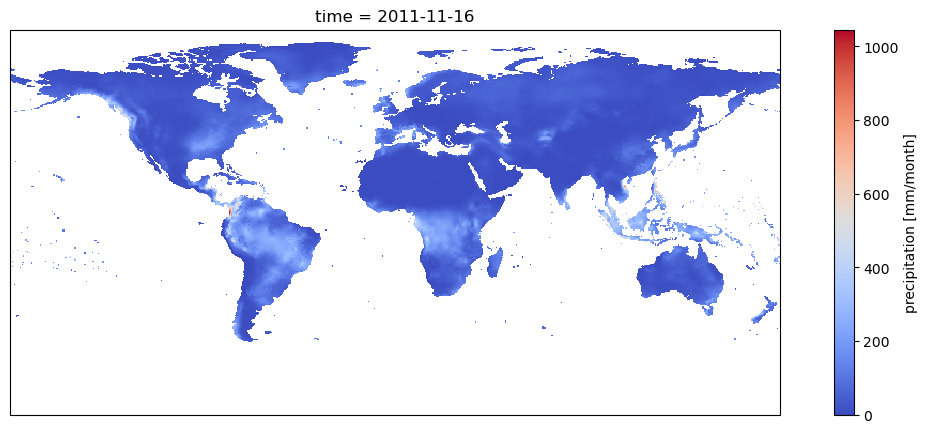

In [52]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.set_extent([65.0, 107.0, 24.0, 46.0])
dset.pre[10].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
